# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
    * [3.4.1 Ski data](#3.4.1_Ski_data)
    * [3.4.2 State-wide summary data](#3.4.2_State-wide_summary_data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Top States By Order Of Each Of The Summary Statistics](#3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics)
      * [3.5.1.1 Total state area](#3.5.1.1_Total_state_area)
      * [3.5.1.2 Total state population](#3.5.1.2_Total_state_population)
      * [3.5.1.3 Resorts per state](#3.5.1.3_Resorts_per_state)
      * [3.5.1.4 Total skiable area](#3.5.1.4_Total_skiable_area)
      * [3.5.1.5 Total night skiing area](#3.5.1.5_Total_night_skiing_area)
      * [3.5.1.6 Total days open](#3.5.1.6_Total_days_open)
    * [3.5.2 Resort density](#3.5.2_Resort_density)
      * [3.5.2.1 Top states by resort density](#3.5.2.1_Top_states_by_resort_density)
    * [3.5.3 Visualizing High Dimensional Data](#3.5.3_Visualizing_High_Dimensional_Data)
      * [3.5.3.1 Scale the data](#3.5.3.1_Scale_the_data)
        * [3.5.3.1.1 Verifying the scaling](#3.5.3.1.1_Verifying_the_scaling)
      * [3.5.3.2 Calculate the PCA transformation](#3.5.3.2_Calculate_the_PCA_transformation)
      * [3.5.3.3 Average ticket price by state](#3.5.3.3_Average_ticket_price_by_state)
      * [3.5.3.4 Adding average ticket price to scatter plot](#3.5.3.4_Adding_average_ticket_price_to_scatter_plot)
    * [3.5.4 Conclusion On How To Handle State Label](#3.5.4_Conclusion_On_How_To_Handle_State_Label)
    * [3.5.5 Ski Resort Numeric Data](#3.5.5_Ski_Resort_Numeric_Data)
      * [3.5.5.1 Feature engineering](#3.5.5.1_Feature_engineering)
      * [3.5.5.2 Feature correlation heatmap](#3.5.5.2_Feature_correlation_heatmap)
      * [3.5.5.3 Scatterplots of numeric features against ticket price](#3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price)
  * [3.6 Summary](#3.6_Summary)


## 3.2 Introduction<a id='3.2_Introduction'></a>

At this point, I have a firm idea of what your data science problem is and have the data that could help solve it. The business problem is to predict energy production and consumption. The data I have conslidated from multiple csv files in data wrangling part has continent, country, year and energy, it also has missing values that will be taken care in EDA. Data is from 1981 to 2021 for various energy types Coal, Nuclear, Pertroleum, and Netural Gas. I will explore data for different continenets, countires for all energy types production and consumption patterns and prepare data for modeling.


## 3.3 Imports<a id='3.3_Imports'></a>

In [59]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#from library.sb_utils import save_file

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

### 3.4.1 Energy data<a id='3.4.1_Energy_data'></a>

In [60]:
energy_df = pd.read_csv('../Data_Files/Final_data.csv')

In [61]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77280 entries, 0 to 77279
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  77280 non-null  int64 
 1   Continent   77280 non-null  object
 2   Country     77280 non-null  object
 3   Year        77280 non-null  object
 4   Energy      77278 non-null  object
 5   Usage       77280 non-null  object
 6   Source      77280 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.1+ MB


There are missing values in the energy column.

In [71]:
energy_df['Year'] = energy_df[['Year']].apply(pd.to_datetime)

In [62]:
energy_df.describe()

,Unnamed: 0
count,77280.000000
mean,38639.500000
std,22308.958739
min,0.000000
25%,19319.750000
50%,38639.500000
75%,57959.250000
max,77279.000000


In [63]:
energy_df.head()

,Unnamed: 0,Continent,Country,Year,Energy,Usage,Source
0,0,Africa,Algeria,1980-01-01,0.002576225,Production,Neuclear
1,67691,Asia & Oceania,Hong Kong,1980-01-01,0,Production,NaturalGas
2,67692,Asia & Oceania,India,1980-01-01,0.058701,Production,NaturalGas
3,67693,Asia & Oceania,Indonesia,1980-01-01,0.7194,Production,NaturalGas
4,67694,Asia & Oceania,Japan,1980-01-01,0.085878,Production,NaturalGas


There is additional index column added to dataframe. Which can be dropped.

In [64]:
energy_df = energy_df.drop(['Unnamed: 0'], axis=1)
energy_df.head()

,Continent,Country,Year,Energy,Usage,Source
0,Africa,Algeria,1980-01-01,0.002576225,Production,Neuclear
1,Asia & Oceania,Hong Kong,1980-01-01,0,Production,NaturalGas
2,Asia & Oceania,India,1980-01-01,0.058701,Production,NaturalGas
3,Asia & Oceania,Indonesia,1980-01-01,0.7194,Production,NaturalGas
4,Asia & Oceania,Japan,1980-01-01,0.085878,Production,NaturalGas


In [65]:
# In source 'Neuclear' is spelled wrong, replace it with 'Nuclear'
energy_df['Source'].replace('Neuclear', 'Nuclear', inplace=True)
energy_df.head()

,Continent,Country,Year,Energy,Usage,Source
0,Africa,Algeria,1980-01-01,0.002576225,Production,Nuclear
1,Asia & Oceania,Hong Kong,1980-01-01,0,Production,NaturalGas
2,Asia & Oceania,India,1980-01-01,0.058701,Production,NaturalGas
3,Asia & Oceania,Indonesia,1980-01-01,0.7194,Production,NaturalGas
4,Asia & Oceania,Japan,1980-01-01,0.085878,Production,NaturalGas


In [66]:
energy_df.shape

(77280, 6)

In [67]:
energy_df.isnull().sum()

Continent    0
Country      0
Year         0
Energy       2
Usage        0
Source       0
dtype: int64

In [68]:
energy_df.Year.unique()

array(['1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
       '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
       '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
       '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
       '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
       '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
       '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
       '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
       '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
       '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
       '2020-01-01', '2021-01-01'], dtype=object)

Data includes 42 years of history, 1980 to 2021.

##### Checking time series gap

In [76]:
# Sorting dataframe by Year column
energy_df = energy_df.sort_values(by=['Year'])
energy_df.dtypes

Continent            object
Country              object
Year         datetime64[ns]
Energy               object
Usage                object
Source               object
dtype: object

In [75]:
# Creating a column with previous value of the year and subtracting one value ahead of it and storing result in Result column
energy_df['previous'] = (pd.DatetimeIndex(energy_df['Year']).year).shift(1)
energy_df['Result'] = (pd.DatetimeIndex(energy_df['Year']).year) - energy_df['previous']
print(energy_df)

NotImplementedError: This method is only implemented for DatetimeIndex, PeriodIndex and TimedeltaIndex; Got type Int64Index

In [50]:
# Check result column values
energy_df['Result'].value_counts()

KeyError: 'Result'

Result column is created by subtacting Year from its previous value and there is no value found more 1, it means there is no time gap. 

Now Previous and Result column no longer needed, it can be dropped.

In [51]:
energy_df = energy_df.drop(['previous','Result'], axis=1)


KeyError: "['Result'] not found in axis"

In [ ]:
energy_df.head()

#### Checking null values in other columns

In [52]:
null_df = energy_df[energy_df["Energy"].isnull()]
null_df['Source'].value_counts()

Petrolium    2
Name: Source, dtype: int64

In [53]:
null_df[['Continent', 'Country']].value_counts()

Continent       Country                         
Asia & Oceania          Northern Mariana Islands    1
                        Tuvalu                      1
dtype: int64

In [54]:
null_df['Continent'].value_counts()

Asia & Oceania    2
Name: Continent, dtype: int64

In [55]:
null_df['Usage'].value_counts()

Consumption    2
Name: Usage, dtype: int64

There are 5408 missing values in the Energy column. Missing values proportion for production and consumption is similar. Also, almost similar proportion of missing values for each energy type. Most of the countries with missing values belong to Europe and Eurasia. To make furture analysis, I will drop rows with missing values.

### 3.4.2 Ploting Production by country <a id='3.4.2_Ploting_Production_by_country'></a>

EDA guiding questions:
1. How energy trends change over the time based on production and consumption?
2. How energy trends change over the time based on source production and consumption? Which soure is producing more energy and which source energy is getting more consumed. Plot based on continent.
3. Which county is producing which source of energy more?
4. Which county is consuming which source of energy more?

In [56]:
energy_df = energy_df.set_index('Year')

In [57]:
energy_df.groupby('Usage')['Energy'].plot(legend='True', figsize=(15,6))
plt.show()

TypeError: no numeric data to plot

In [58]:
sns.lineplot(energy_df.groupby('Usage')['Energy'].plot(legend='True', figsize=(15,6)))

TypeError: no numeric data to plot

Overall consumption is higher than production but in past 20 years, production is catching up to meet energy needs, even though it is still lower than consumption. 

In [22]:
energy_df.groupby('Source')['Energy'].plot(legend='True', figsize=(15,6))
plt.show()

TypeError: no numeric data to plot

Until 2002 Petrolium was the main source of energy but after that coal energy production and consumption increased.

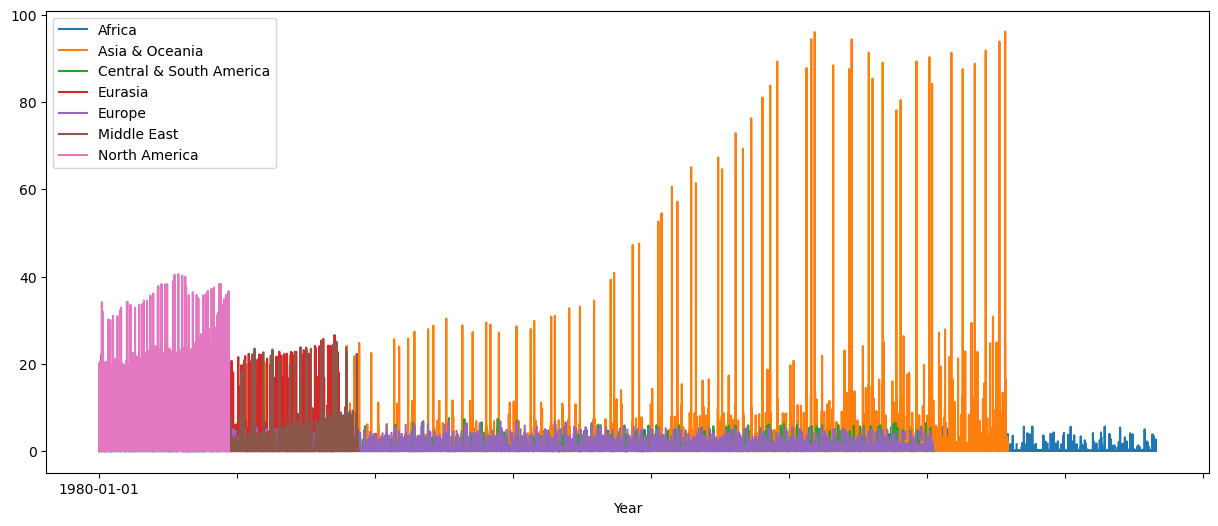

In [89]:
energy_df.groupby('Continent')['Energy'].plot(legend='True', figsize=(15,6))
plt.show()

In past 15 years Asia & Oceania energy production and consumption has increased significantly.

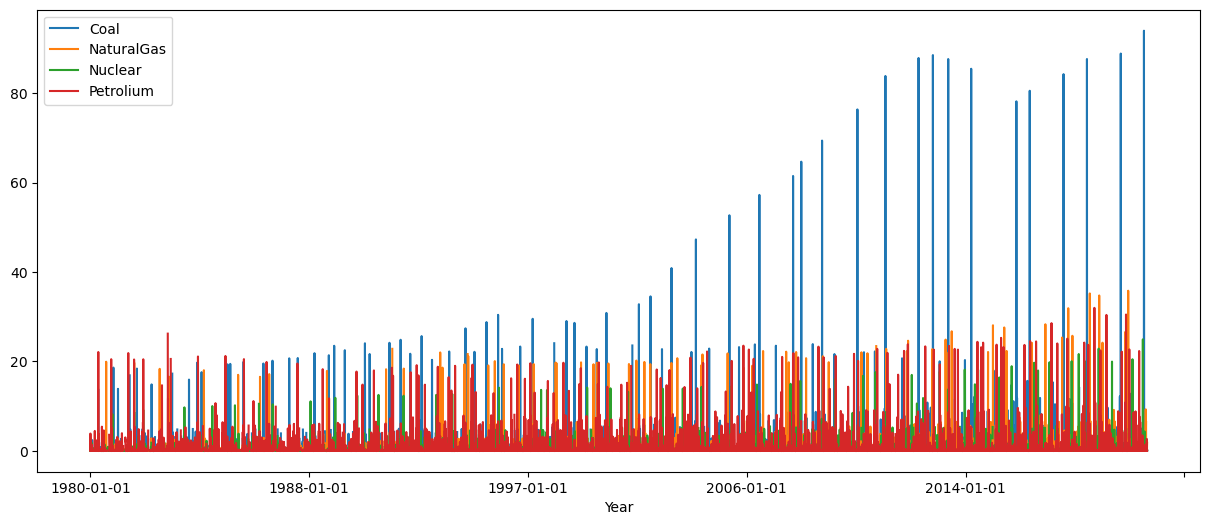

In [90]:
energy_df[energy_df.Usage == 'Production'].groupby('Source')['Energy'].plot(legend='True', figsize=(15,6))
plt.show()

From 1980 to 1990 Petrolium and Natural Gas were the main sources of energy produciton, but after that coal energy production started increasing and now it is the main source of energy production.

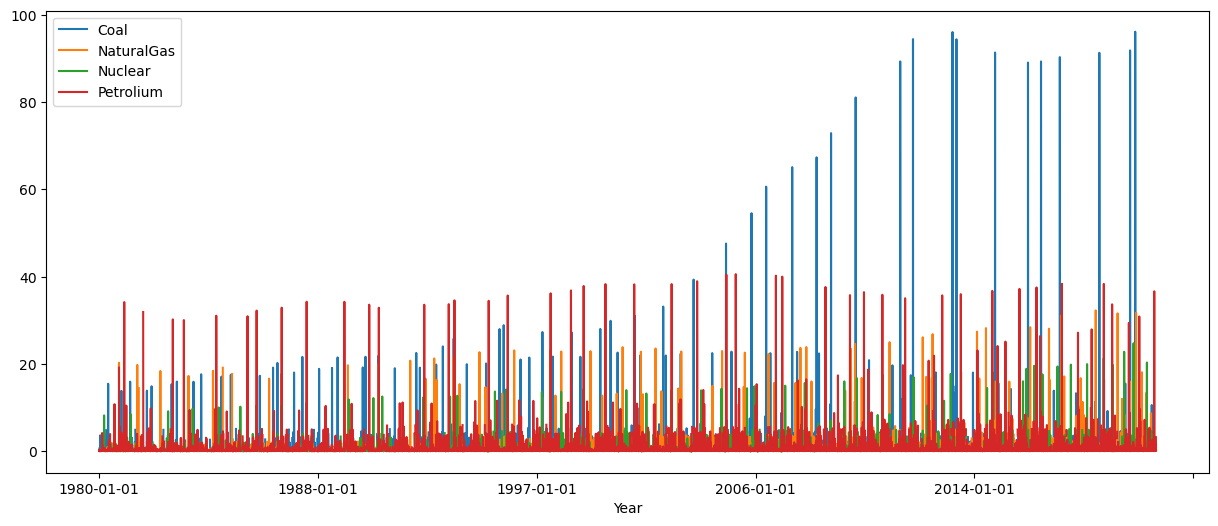

In [91]:
energy_df[energy_df.Usage == 'Consumption'].groupby('Source')['Energy'].plot(legend='True', figsize=(15,6))
plt.show()

From 1980 to 1990 Petrolium and Natural Gas were the main sources of energy produciton, but after that coal energy production started increasing and now it is the main source of energy production.

In [92]:
consum_df = energy_df[energy_df.Usage == 'Consumption']
consum_df.head()
consum_df.Continent.unique()

array(['Asia & Oceania', 'Central & South America', 'Middle East',
       'Africa', 'Europe', 'Eurasia', 'North America'], dtype=object)

In [93]:
prod_df = energy_df[energy_df.Usage == 'Production']
prod_df.head()


,Continent,Country,Energy,Usage,Source,previous
Year,,,,,,
1980-01-01,Africa,Algeria,0.002576,Production,Nuclear,None
1980-01-01,Asia & Oceania,Hong Kong,0.000000,Production,NaturalGas,1980-01-01
1980-01-01,Asia & Oceania,India,0.058701,Production,NaturalGas,1980-01-01
1980-01-01,Asia & Oceania,Indonesia,0.719400,Production,NaturalGas,1980-01-01
1980-01-01,Asia & Oceania,Japan,0.085878,Production,NaturalGas,1980-01-01


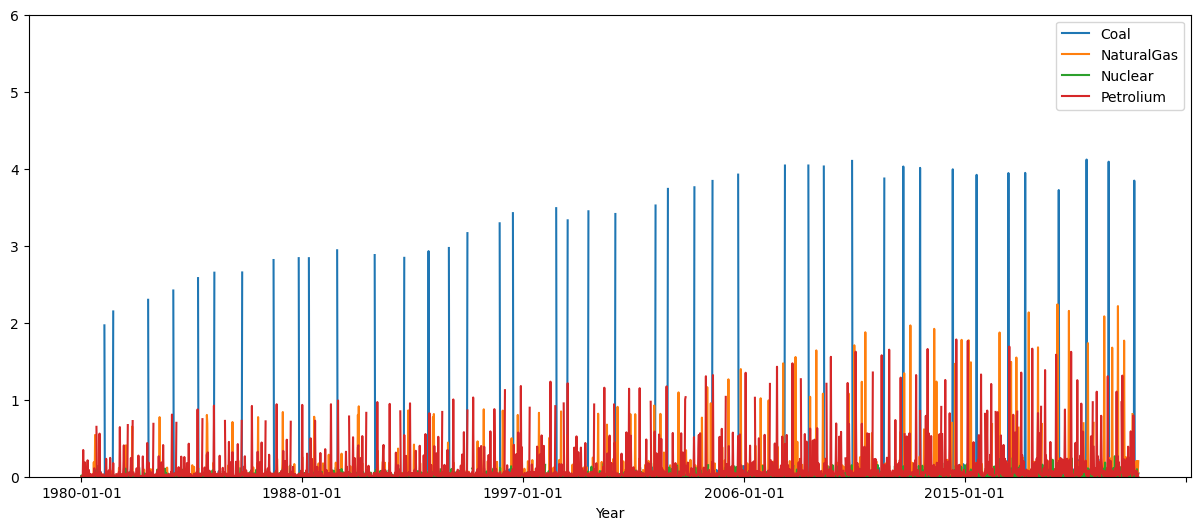

In [94]:
consum_df[consum_df.Continent == 'Africa'].groupby('Source')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,6))
plt.show()

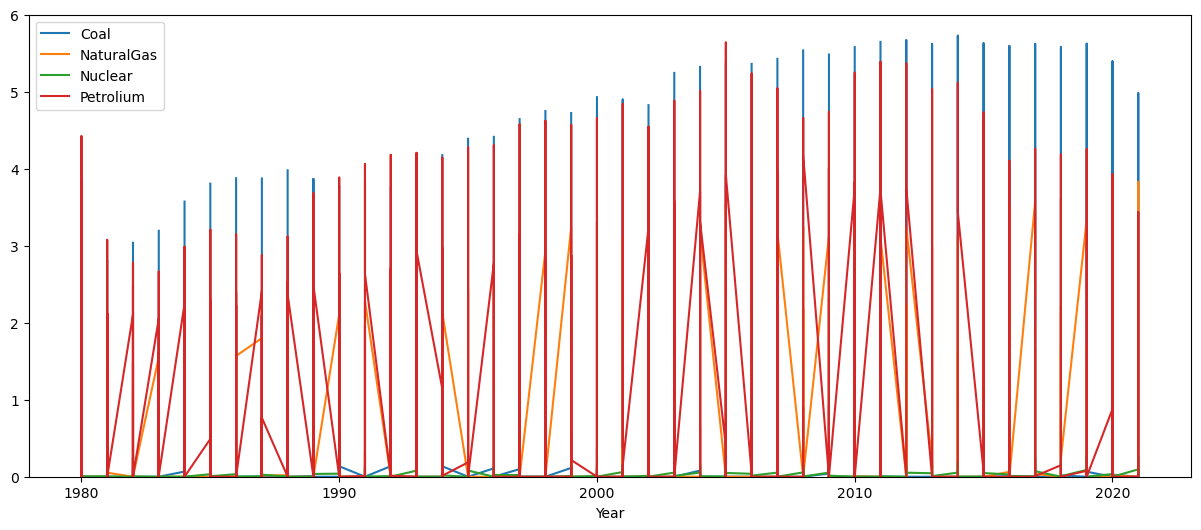

In [54]:
prod_df[prod_df.Continent == 'Africa'].groupby('Source')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,6))
plt.show()

Africa continent was consuming more energy from coal and producing from coal, pertrolium, and NaturalGas more. Trend is similar over 42 years.

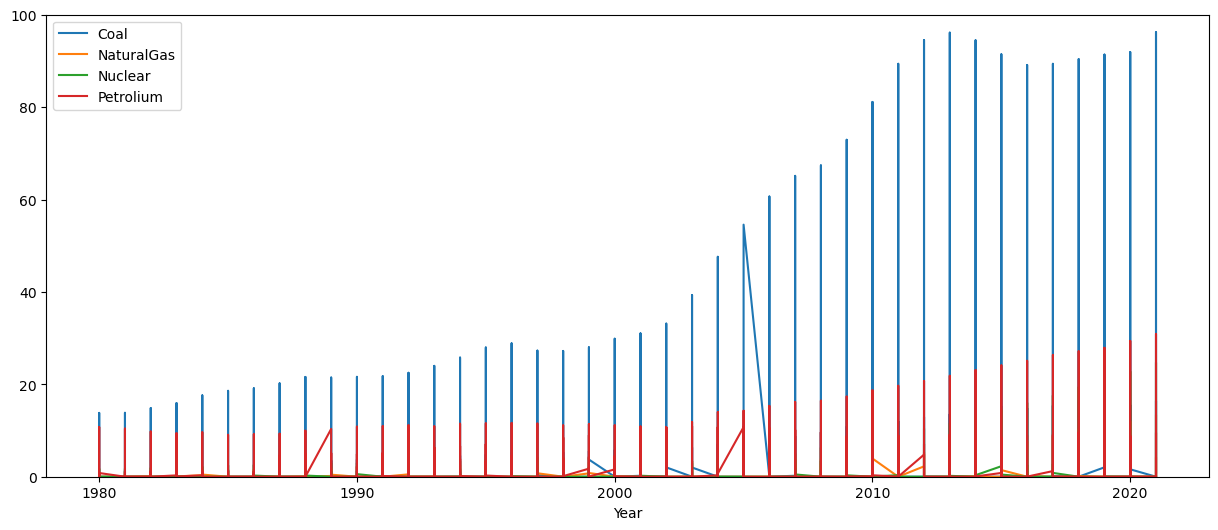

In [55]:
consum_df[consum_df.Continent == 'Asia & Oceania'].groupby('Source')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,100))
plt.show()

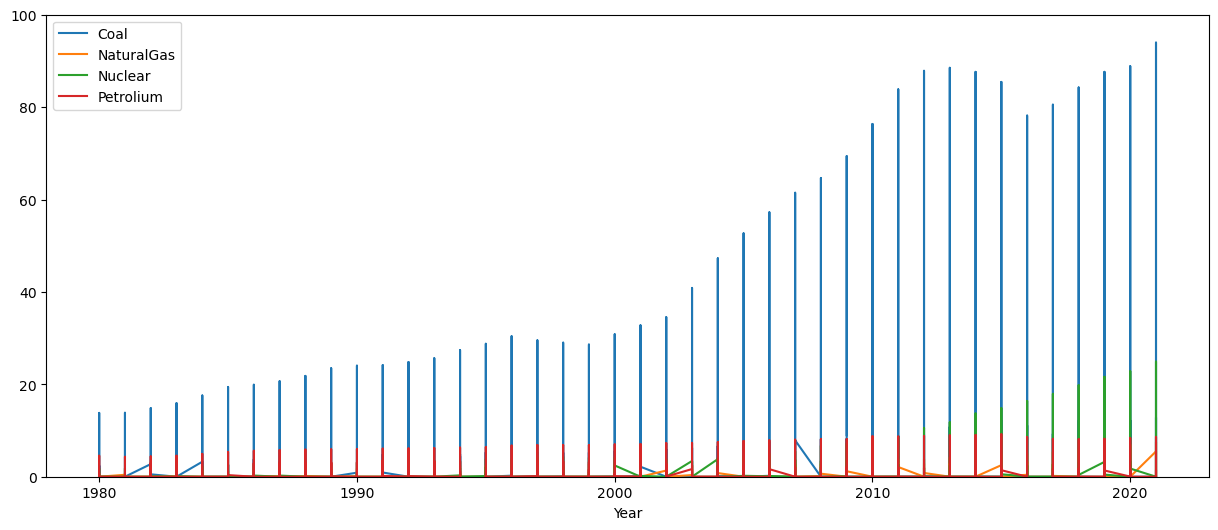

In [56]:
prod_df[prod_df.Continent == 'Asia & Oceania'].groupby('Source')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,100))
plt.show()

Asia & Oceania continent main source of energy production and consumption is Coal. Trend is similar over 42 years.

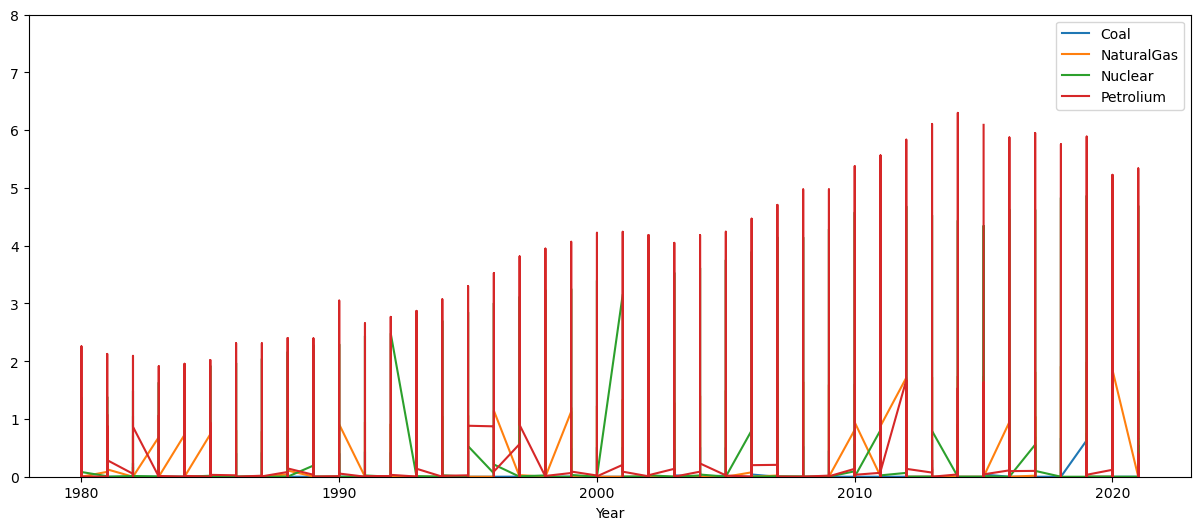

In [66]:
consum_df[consum_df.Continent == 'Central & South America'].groupby('Source')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,8))
plt.show()

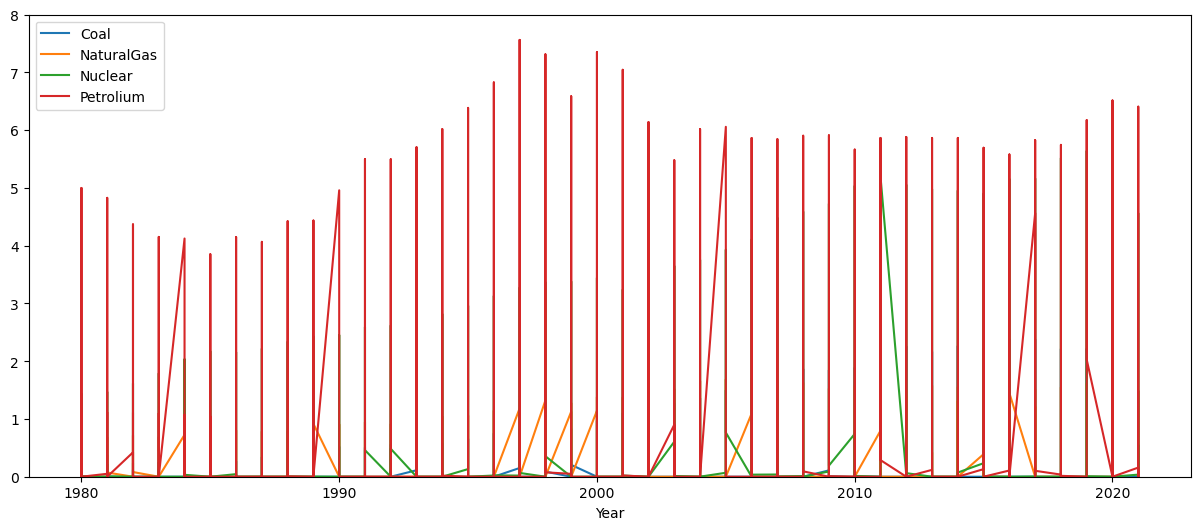

In [58]:
prod_df[prod_df.Continent == 'Central & South America'].groupby('Source')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,8))
plt.show()

Central & South America continent main source of energy production and consumption is Petrolium. Trend is similar over 42 years.

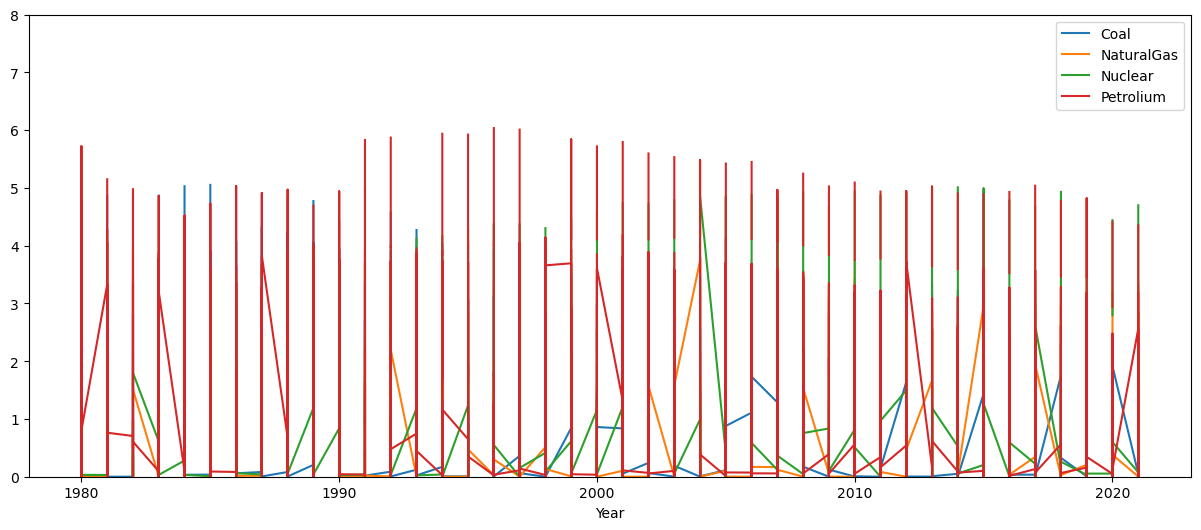

In [59]:
consum_df[consum_df.Continent == 'Europe'].groupby('Source')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,8))
plt.show()

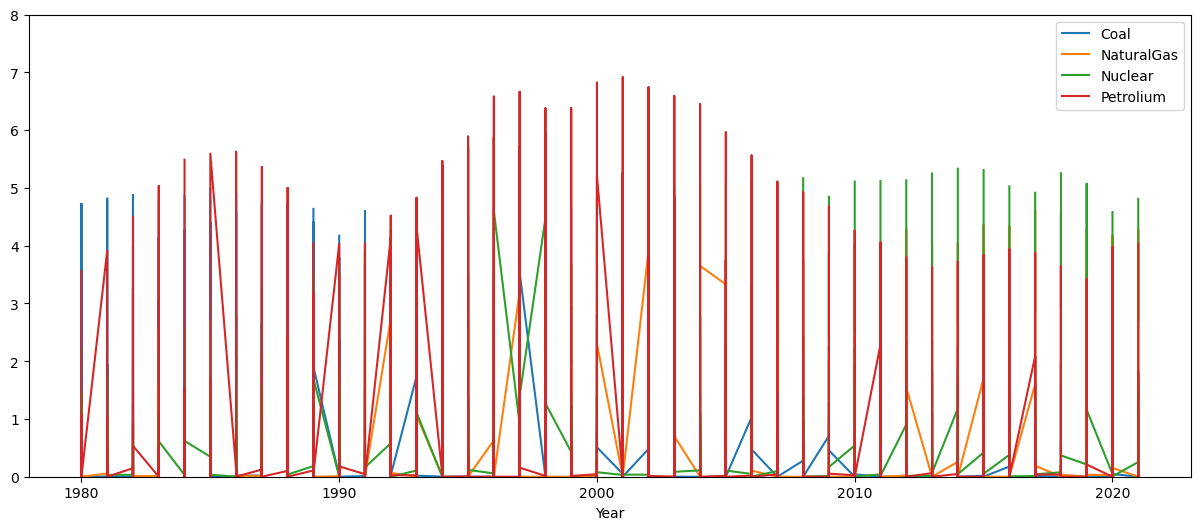

In [60]:
prod_df[prod_df.Continent == 'Europe'].groupby('Source')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,8))
plt.show()

Europe has mixed trend, main source of production and consumptin is pertrolium. Since past 10 years NaturalGas produciton and consumption increased.

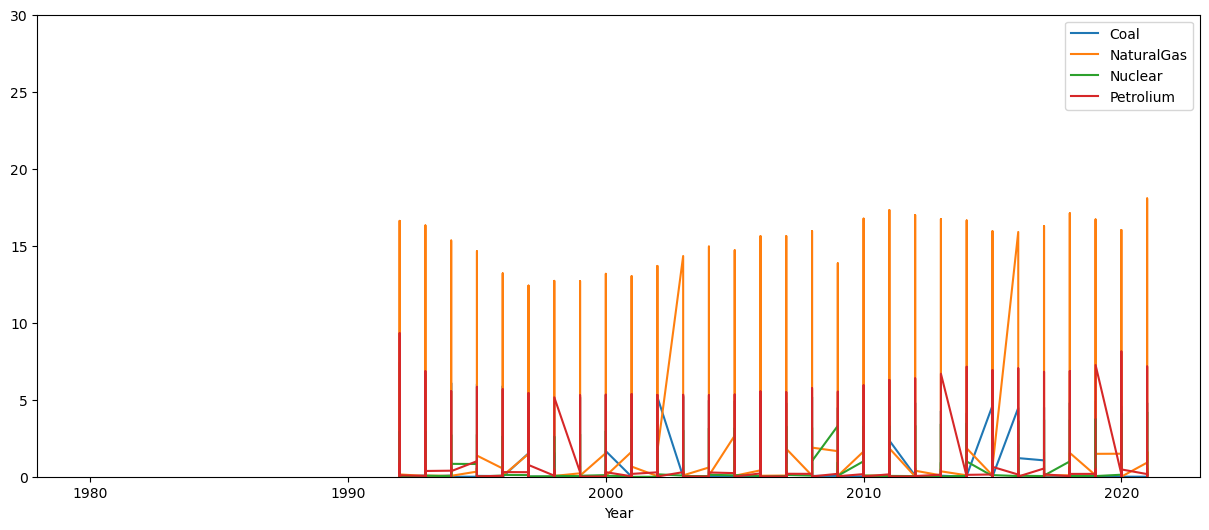

In [61]:
consum_df[consum_df.Continent == 'Eurasia'].groupby('Source')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,30))
plt.show()

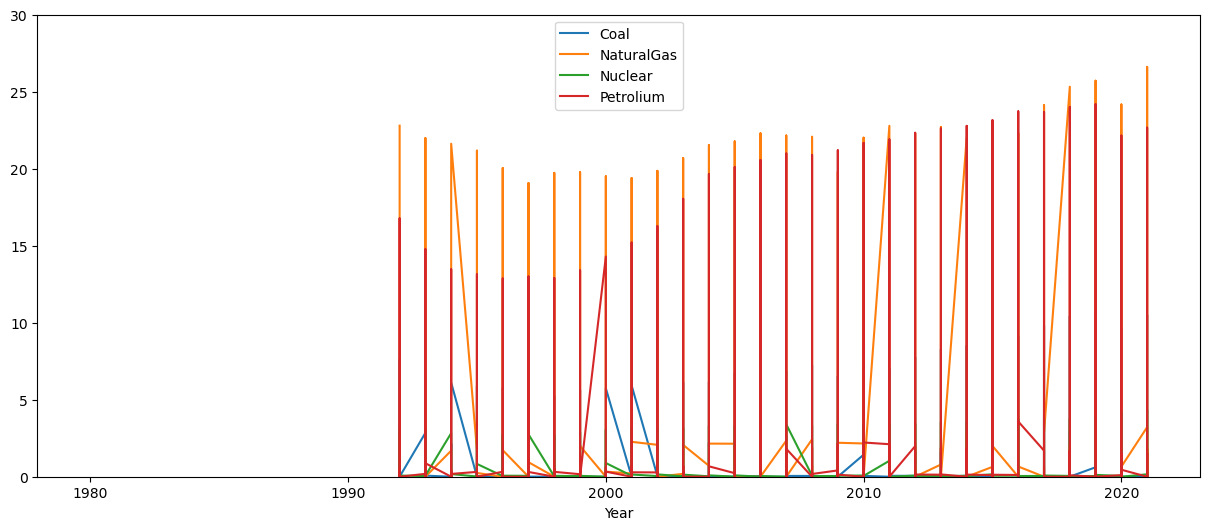

In [62]:
prod_df[prod_df.Continent == 'Eurasia'].groupby('Source')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,30))
plt.show()

For Eurasia continent, we have data from 1992 to 2021. Since 1992 Natual Gas and Petrolium is the main source of production and consumption. Natural Gas production and consumption remained high over the years.

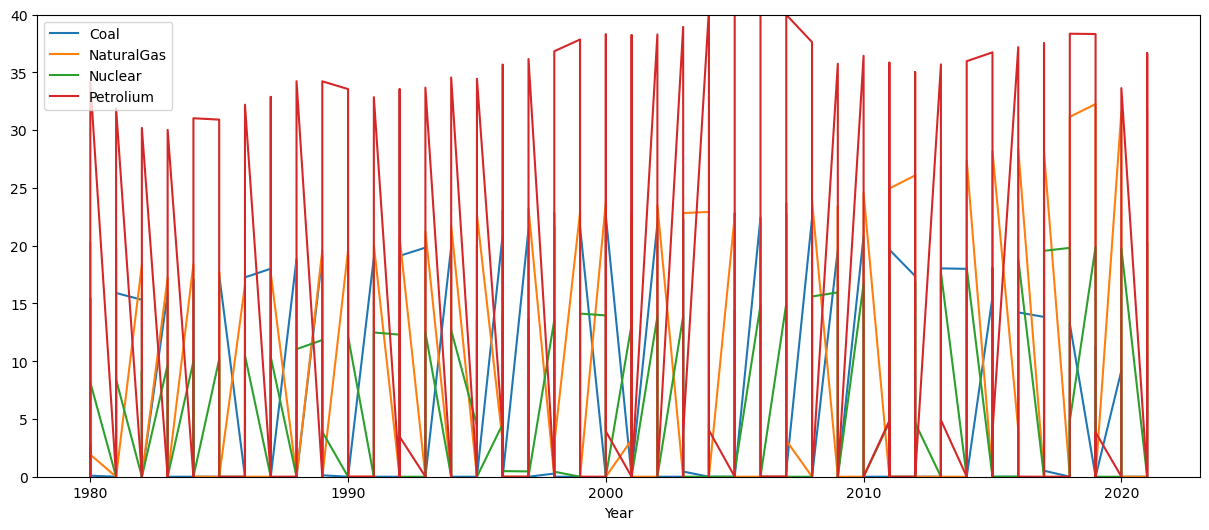

In [63]:
consum_df[consum_df.Continent == 'North America'].groupby('Source')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,40))
plt.show()

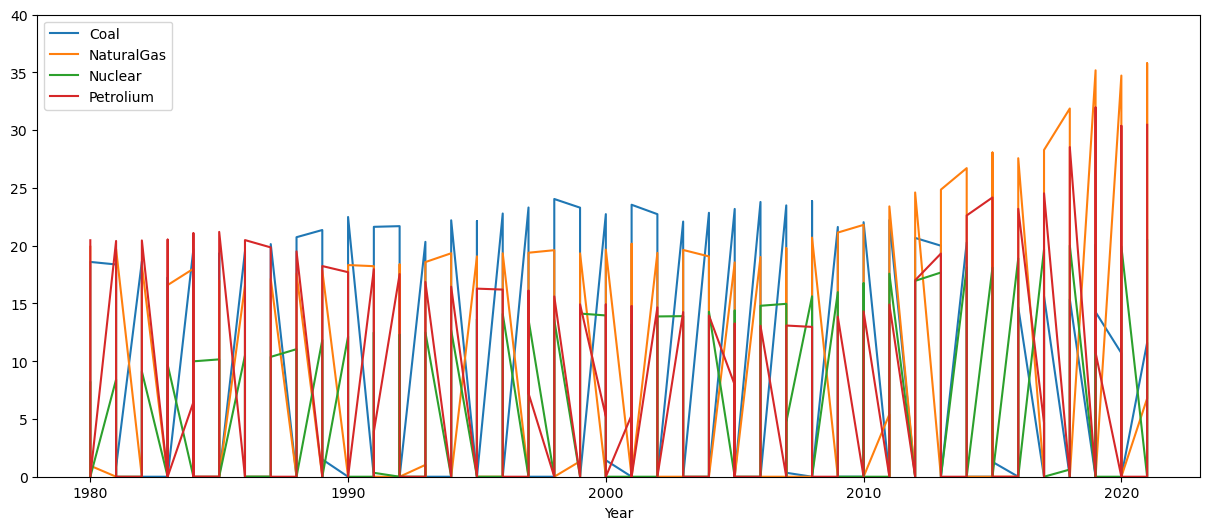

In [64]:
prod_df[prod_df.Continent == 'North America'].groupby('Source')['Energy'].plot(legend='True', figsize=(15,6))
plt.ylim((0,40))
plt.show()

North America has mixed trends. All types of evergy types were being produced and consumed. Main consumption source was Petrolium but energy was produced from all sources. From 1980 to 2008 more energy was produced from coal and pertrolium, after that this trend changed to natural gas and pertrolium.

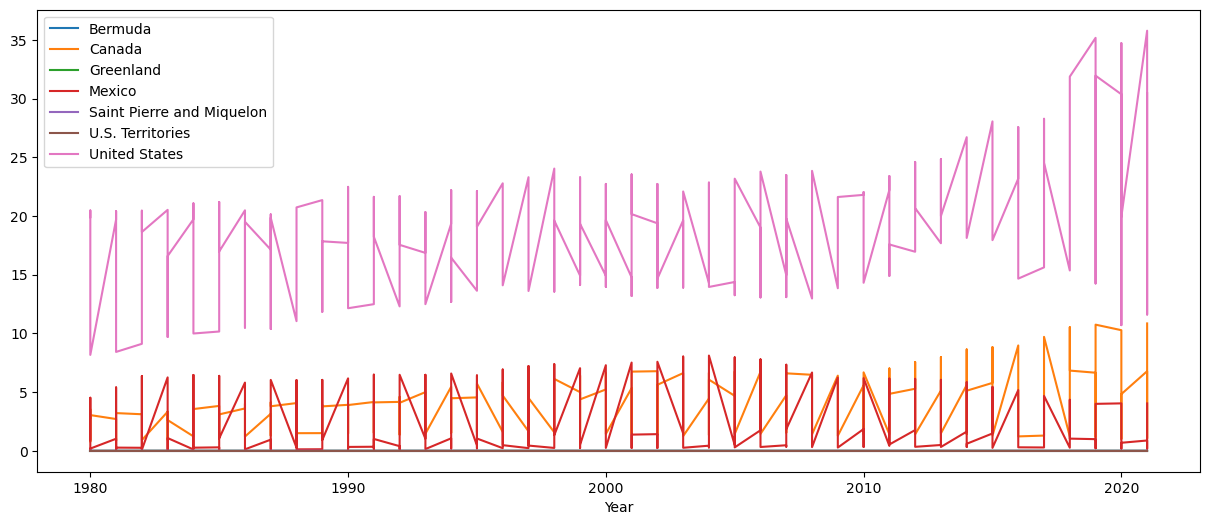

In [68]:
prod_df[prod_df.Continent == 'North America'].groupby('Country')['Energy'].plot(legend='True', figsize=(15,6))
plt.show()